## Environment setup

In [8]:
import torch
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [9]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

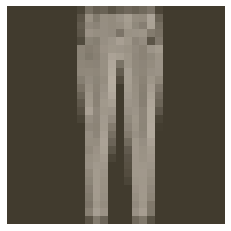

In [10]:
image, label = next(iter(trainloader))
imshow(image[0,:]);

## Build the network

In [11]:
from torch import nn, optim
import torch.nn.functional as F

Network visual:
<img src="assets/mlp_mnist.png" width=600px>

In [12]:
# Define the hyperparameters
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Define the network structure
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[1], output_size),
                     nn.LogSoftmax(dim=1))

* Loss Function: Cross Entropy
$$loss(x,class)=-log\left(\frac{exp(x_{class})}{\sum_{j}exp(x_{j}}\right) = -x_{class} + log\left(\sum_{j}exp(x_{j}\right)$$

* Optimizer: [Adam Optimizer](https://arxiv.org/abs/1412.6980), algorithm for first-order gradient-based optimization of stochastic objective functions, based on adaptive estimates of lower-order moments.

In [14]:
# Define the loss function
criterion = nn.CrossEntropyLoss()
# Define the optimizer - using gradient descent with momentum
optimizer = optim.Adam(model.parameters(), lr=0.003)

# Define the number of time to pass back and forth through the network
epochs = 5

# Make a forward pass
for e in range(epochs):
    running_loss = 0
    
    for images, labels in trainloader:
        # Flatten
        images = images.view(images.shape[0], -1)

        # Pass forward
        output = model.forward(images)
        # Calculate the cost/loss
        loss = criterion(output, labels)
        
        # Clear gradients
        optimizer.zero_grad()
        # Pass backward
        loss.backward()
        # Update the gradient step
        optimizer.step()
        # Update the loss outcome
        running_loss += loss.item()
    else:
        print("Training loss: {}".format(running_loss/len(trainloader)))

Training loss: 0.5010301033729938
Training loss: 0.38732359885597534
Training loss: 0.3533701530254599
Training loss: 0.3305313555813674
Training loss: 0.31695406976888685


## Results

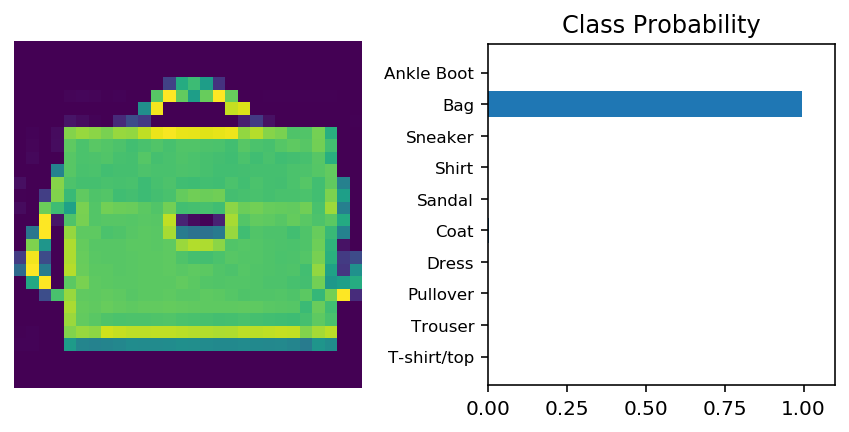

In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Function to view outcome
def view_classify(img, ps, version="MNIST"):
    ''' 
    Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                             'Trouser',
                             'Pullover',
                             'Dress',
                             'Coat',
                             'Sandal',
                             'Shirt',
                             'Sneaker',
                             'Bag',
                             'Ankle Boot'],
                            size='small');
    
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1].view(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
view_classify(img, ps, version='Fashion')

## Inference and Validation

In [20]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [21]:
# Another version of structuring the model with PyTorch
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [22]:
model = Classifier()

images, labels = next(iter(testloader))
# Get the class probabilities
ps = torch.exp(model(images))
# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(ps.shape)

torch.Size([64, 10])


In [23]:
# top_p is a tensor of probability values
# top_class is tensor of the class indices
top_p, top_class = ps.topk(1, dim=1)

# Look at the most likely classes for the first 10 examples
print(top_class[:10,:])

tensor([[6],
        [6],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [9],
        [6]])


Now we can check if the predicted classes match the labels. This is simple to do by equating `top_class` and `labels`, but we have to be careful of the shapes. Here `top_class` is a 2D tensor with shape `(64, 1)` while `labels` is 1D with shape `(64)`. To get the equality to work out the way we want, `top_class` and `labels` must have the same shape.

If we do

```python
equals = top_class == labels
```

`equals` will have shape `(64, 64)`, try it yourself. What it's doing is comparing the one element in each row of `top_class` with each element in `labels` which returns 64 True/False boolean values for each row.

In [24]:
equals = top_class == labels.view(*top_class.shape)

Calculate the percentage of correct predictions

In [25]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 15.625%


### Validating

In [26]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                # log-probabilities
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                # probability distribution
                ps = torch.exp(log_ps)
                # Find the top predicted class
                top_p, top_class = ps.topk(1, dim=1)
                # Find where the predicted class matches wit the true classifier labels
                equals = top_class == labels.view(*top_class.shape)
                # Calculate the accuracy
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.513..  Test Loss: 0.414..  Test Accuracy: 0.848
Epoch: 2/30..  Training Loss: 0.386..  Test Loss: 0.421..  Test Accuracy: 0.851
Epoch: 3/30..  Training Loss: 0.358..  Test Loss: 0.378..  Test Accuracy: 0.859
Epoch: 4/30..  Training Loss: 0.332..  Test Loss: 0.373..  Test Accuracy: 0.862
Epoch: 5/30..  Training Loss: 0.315..  Test Loss: 0.387..  Test Accuracy: 0.866
Epoch: 6/30..  Training Loss: 0.302..  Test Loss: 0.388..  Test Accuracy: 0.863
Epoch: 7/30..  Training Loss: 0.291..  Test Loss: 0.396..  Test Accuracy: 0.866
Epoch: 8/30..  Training Loss: 0.281..  Test Loss: 0.394..  Test Accuracy: 0.865
Epoch: 9/30..  Training Loss: 0.272..  Test Loss: 0.383..  Test Accuracy: 0.867
Epoch: 10/30..  Training Loss: 0.263..  Test Loss: 0.371..  Test Accuracy: 0.870
Epoch: 11/30..  Training Loss: 0.261..  Test Loss: 0.354..  Test Accuracy: 0.880
Epoch: 12/30..  Training Loss: 0.252..  Test Loss: 0.392..  Test Accuracy: 0.875
Epoch: 13/30..  Training Loss: 0.247.

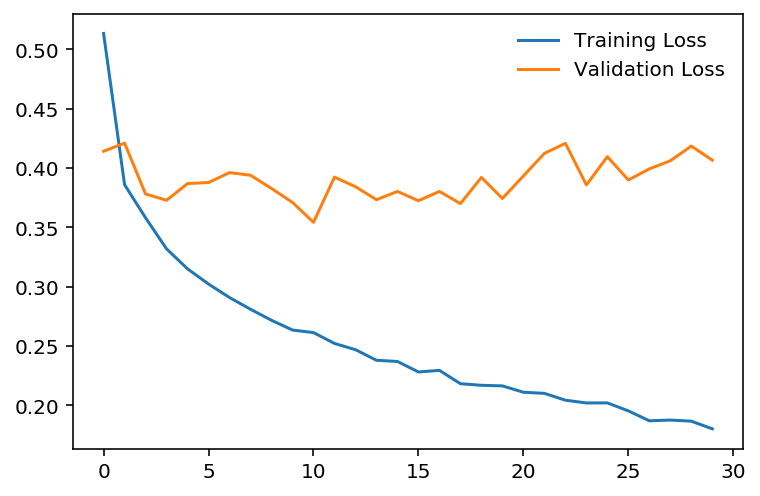

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.legend(frameon=False)
plt.show()

### Overfit
The network learns the training set better and better, resulting in lower training losses. However, it starts having problems generalizing to data outside the training set leading to the validation loss increasing.

One option is to use the version of the model with the lowest validation loss, here the one around 8-10 training epochs. This strategy is called *early-stopping*

The most common method to reduce overfitting (outside of early-stopping) is *dropout*, where we randomly drop input units. This forces the network to share information between weights, increasing it's ability to generalize to new data.

In [28]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [29]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            # Switch into evaluation mode
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.601..  Test Loss: 0.496..  Test Accuracy: 0.816
Epoch: 2/30..  Training Loss: 0.477..  Test Loss: 0.450..  Test Accuracy: 0.836
Epoch: 3/30..  Training Loss: 0.451..  Test Loss: 0.431..  Test Accuracy: 0.851
Epoch: 4/30..  Training Loss: 0.432..  Test Loss: 0.411..  Test Accuracy: 0.856
Epoch: 5/30..  Training Loss: 0.421..  Test Loss: 0.394..  Test Accuracy: 0.858
Epoch: 6/30..  Training Loss: 0.409..  Test Loss: 0.398..  Test Accuracy: 0.863
Epoch: 7/30..  Training Loss: 0.404..  Test Loss: 0.407..  Test Accuracy: 0.854
Epoch: 8/30..  Training Loss: 0.402..  Test Loss: 0.381..  Test Accuracy: 0.869
Epoch: 9/30..  Training Loss: 0.395..  Test Loss: 0.407..  Test Accuracy: 0.857
Epoch: 10/30..  Training Loss: 0.390..  Test Loss: 0.391..  Test Accuracy: 0.857
Epoch: 11/30..  Training Loss: 0.387..  Test Loss: 0.412..  Test Accuracy: 0.851
Epoch: 12/30..  Training Loss: 0.384..  Test Loss: 0.391..  Test Accuracy: 0.862
Epoch: 13/30..  Training Loss: 0.375.

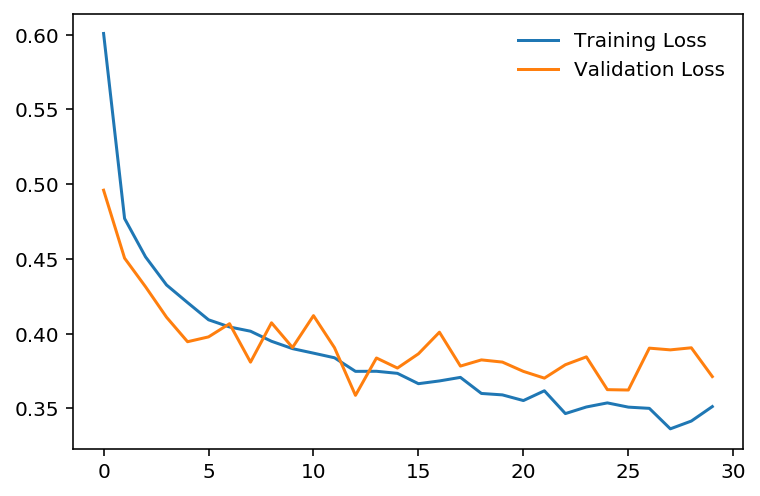

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.legend(frameon=False)
plt.show()

Overfitting is reduced

Now that the model is trained, we can use it for inference.

Set the model in inference mode with `model.eval()`. Turn off autograd with the `torch.no_grad()` context.

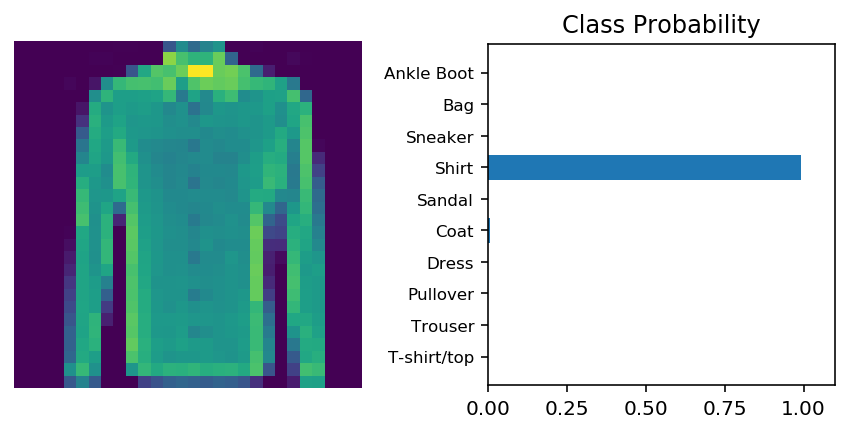

In [32]:
# Test out the network

model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Plot the image and probabilities
view_classify(img.view(1, 28, 28), ps, version='Fashion')